In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tokenizers import Tokenizer
from tokenizers.models import WordPiece
from tokenizers.trainers import WordPieceTrainer
from tokenizers.pre_tokenizers import Whitespace

# load dataset

In [2]:
df_train = pd.read_parquet("data/train.parquet")
df_test = pd.read_parquet("data/test.parquet")

In [3]:
df_train

,text,label
0,Wie sieht das Chrysler Building in New York aus?,question
1,Wie hoch ist die durchschnittliche Lebenserwar...,question
2,Wie heißen unterschiedliche Themenbereiche des...,question
3,Wie pendeln Menschen aus Vororten nach New York?,question
4,Seit wann gibt es in Mali eine Mehrparteiendem...,question
...,...,...
1069,Ein großer Test kommt und ich muss meine Arbei...,concern
1070,"Ich muss mich um das College sorgen, und die S...",concern
1071,"Ich habe immer noch eine schreckliche Zeit, mi...",concern
1072,"Ich mache mir jetzt Sorgen, dass ich nicht wie...",concern


# EDA

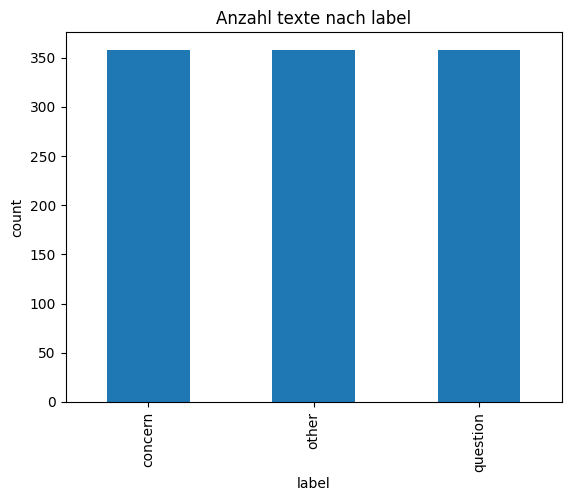

In [6]:
df_train.groupby("label").size().plot.bar()
plt.xlabel("label")
plt.ylabel("count")
plt.title("Anzahl texte nach label")
plt.show()

In diesem Plot ist zu erkennen, dass jede Gruppe (label) im train-set gleich vertreten ist.

In [12]:
df_train

,text,label
0,Wie sieht das Chrysler Building in New York aus?,question
1,Wie hoch ist die durchschnittliche Lebenserwar...,question
2,Wie heißen unterschiedliche Themenbereiche des...,question
3,Wie pendeln Menschen aus Vororten nach New York?,question
4,Seit wann gibt es in Mali eine Mehrparteiendem...,question
...,...,...
1069,Ein großer Test kommt und ich muss meine Arbei...,concern
1070,"Ich muss mich um das College sorgen, und die S...",concern
1071,"Ich habe immer noch eine schreckliche Zeit, mi...",concern
1072,"Ich mache mir jetzt Sorgen, dass ich nicht wie...",concern


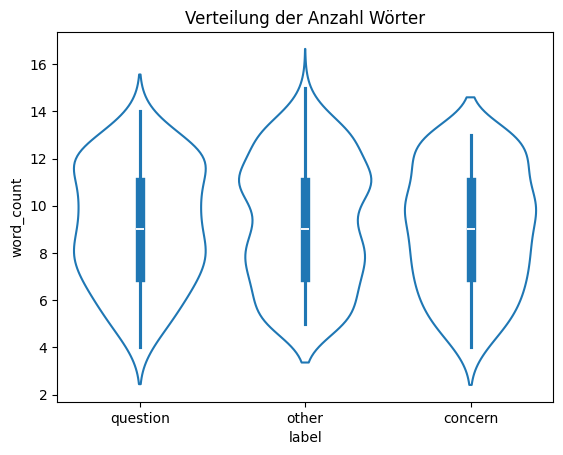

In [7]:
sns.violinplot(df_train.assign(word_count=df_train['text'].apply(lambda x: len(x.split(" "))))[["label", "word_count"]], x="label", y="word_count", fill=False) 
plt.title("Verteilung der Anzahl Wörter")
plt.show()

Um herauszufinden, wie die Wortverteilung pro Klasse aussieht, wurde jeweils die Anzahl Wörter im Text gezählt und anschliessend ein Violinplot visualisiert.<br>
Dieser Plot zeigt, dass die Verteilung nach Klasse ungefär gleich ist. Median sowie Q1 und Q2 sind etwa am gleichen Ort und die Violinen zeigt auch eine ähnliche Verteilung.

In [70]:
# Erstellen Sie einen neuen WordPiece-Tokenizer
tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

# Erstellen Sie einen neuen WordPiece-Trainer
trainer = WordPieceTrainer(
    special_tokens=["[UNK]"],
)

#train
tokenizer.train_from_iterator(df_train.text.tolist(), trainer)

for i in range(30):
    print(df_train.text[i])
    print(tokenizer.encode(df_train.text[i]).tokens)
    print("\n")

Wie sieht das Chrysler Building in New York aus?
['Wie', 'sieht', 'das', 'Chrysler', 'Building', 'in', 'New', 'York', 'aus', '?']


Wie hoch ist die durchschnittliche Lebenserwartung in Europa?
['Wie', 'hoch', 'ist', 'die', 'durchschnittliche', 'Lebenserwartung', 'in', 'Europa', '?']


Wie heißen unterschiedliche Themenbereiche des Zoos in Hannover?
['Wie', 'heißen', 'unterschiedliche', 'Themenbereiche', 'des', 'Zoos', 'in', 'Hannover', '?']


Wie pendeln Menschen aus Vororten nach New York?
['Wie', 'pendeln', 'Menschen', 'aus', 'Vororten', 'nach', 'New', 'York', '?']


Seit wann gibt es in Mali eine Mehrparteiendemokratie? 
['Seit', 'wann', 'gibt', 'es', 'in', 'Mali', 'eine', 'Mehrparteiendemokratie', '?']


Warum assoziiert man die spanische Region Galicien mit Irland?
['Warum', 'assoziiert', 'man', 'die', 'spanische', 'Region', 'Galicien', 'mit', 'Irland', '?']


Welche Geräte kann man mit einem USB-Netzteil laden?
['Welche', 'Geräte', 'kann', 'man', 'mit', 'einem', 'USB', '-', 'Net